In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import keras.utils as image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [2]:
# All Categories from dataset
category = ["Basil", "Bok choy", "HolyBasil", "Kale"]
labels_dict_train = dict(category = [], filepath = [])

In [3]:
def insert_directory (category_type):
    dir_address = '/kaggle/input/vegetable-fulldataset/VegetableDataset/' + str(category_type)
    for dirname, _, filenames in os.walk(dir_address):
        for filename in filenames:
            labels_dict_train['category'].append(category_type)
            labels_dict_train['filepath'].append(os.path.join(dirname, filename))

In [4]:
for i in range (0,4):
    insert_directory(category[i])

In [5]:
df_train = pd.DataFrame(labels_dict_train)

In [6]:
df_train.head()

,category,filepath
0,Basil,/kaggle/input/vegetable-fulldataset/VegetableD...
1,Basil,/kaggle/input/vegetable-fulldataset/VegetableD...
2,Basil,/kaggle/input/vegetable-fulldataset/VegetableD...
3,Basil,/kaggle/input/vegetable-fulldataset/VegetableD...
4,Basil,/kaggle/input/vegetable-fulldataset/VegetableD...


In [7]:
print(df_train)

    category                                           filepath
0      Basil  /kaggle/input/vegetable-fulldataset/VegetableD...
1      Basil  /kaggle/input/vegetable-fulldataset/VegetableD...
2      Basil  /kaggle/input/vegetable-fulldataset/VegetableD...
3      Basil  /kaggle/input/vegetable-fulldataset/VegetableD...
4      Basil  /kaggle/input/vegetable-fulldataset/VegetableD...
..       ...                                                ...
193     Kale  /kaggle/input/vegetable-fulldataset/VegetableD...
194     Kale  /kaggle/input/vegetable-fulldataset/VegetableD...
195     Kale  /kaggle/input/vegetable-fulldataset/VegetableD...
196     Kale  /kaggle/input/vegetable-fulldataset/VegetableD...
197     Kale  /kaggle/input/vegetable-fulldataset/VegetableD...

[198 rows x 2 columns]


In [8]:
X_data = np.zeros((len(df_train), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(df_train['category'], classes = category)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(df_train))):
    img = image.load_img(df_train['filepath'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 198/198 [00:04<00:00, 49.21it/s]


Train Images shape:  (198, 224, 224, 3)  size: 29,804,544
One-hot encoded output shape:  (198, 4)  size: 792


In [9]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(category), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

In [10]:
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)


In [11]:
epochs = 200
batch_size = 64

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (X_val, Y_val))

Epoch 1/200
3/3 [==============================] - 15s 4s/step - loss: 7.7082 - accuracy: 0.2465 - val_loss: 7.6599 - val_accuracy: 0.2222
Epoch 2/200
3/3 [==============================] - 13s 4s/step - loss: 7.6413 - accuracy: 0.2535 - val_loss: 7.5962 - val_accuracy: 0.2222
Epoch 3/200
3/3 [==============================] - 13s 4s/step - loss: 7.5759 - accuracy: 0.2746 - val_loss: 7.5309 - val_accuracy: 0.2222
Epoch 4/200
3/3 [==============================] - 13s 4s/step - loss: 7.5125 - accuracy: 0.3028 - val_loss: 7.4672 - val_accuracy: 0.1667
Epoch 5/200
3/3 [==============================] - 14s 4s/step - loss: 7.4489 - accuracy: 0.3380 - val_loss: 7.4048 - val_accuracy: 0.1667
Epoch 6/200
3/3 [==============================] - 13s 4s/step - loss: 7.3858 - accuracy: 0.3521 - val_loss: 7.3430 - val_accuracy: 0.1944
Epoch 7/200
3/3 [==============================] - 13s 4s/step - loss: 7.3232 - accuracy: 0.3521 - val_loss: 7.2816 - val_accuracy: 0.2222
Epoch 8/200
3/3 [==========

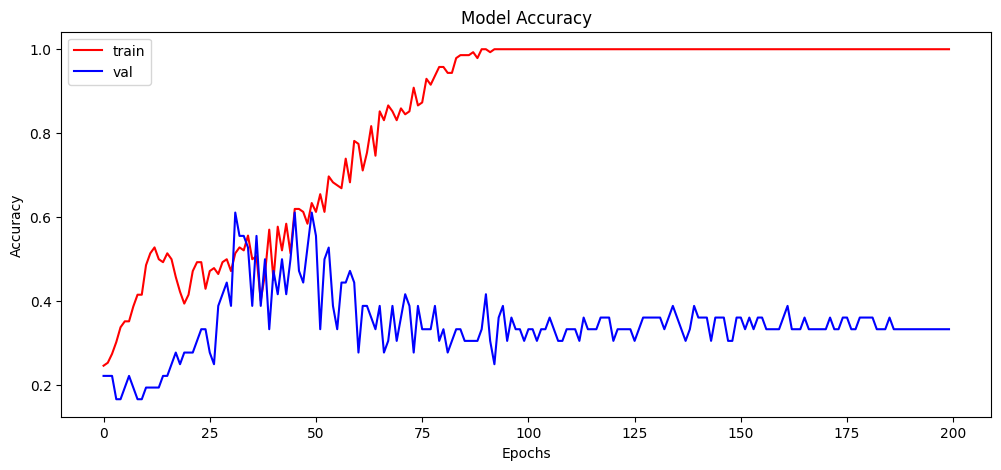

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()